<font color='cornflowerblue' size=4>Here is the interactive section of the 2nd exoplanets workbook! 

In [1]:
#################################################################
# import some packages that will make programming easier for us #
#################################################################
import rebound
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline  

#################################################################
# in order to use other notebooks in this folder,               #
# we have to let python know where to look in our google drive  #
#################################################################

%run tools.ipynb 
# Some behind-the-scenes tools to simplify some complicated code


In [2]:
# masses are all going to be in kg. In order to get masses in solar masses, just divide each one by the mass of the sun!
mass_Sun     = 1.989e30
mass_Mercury = 3.285e23
mass_Venus   = 4.867e24 # similar to the mass of the earth!
mass_Earth   = 5.972e24
mass_Mars    = 6.390e23
mass_Jupiter = 1.898e27
mass_Saturn  = 5.683e26
mass_Uranus  = 8.681e25
mass_Neptune = 1.024e26
mass_Pluto   = 1.309e22 # not a planet, but still fun to plot!

# here, the mass of Jupiter in solar masses is mass_Jupiter/mass_Sun.

In [3]:
# the following distances are all in AU!
a_Mercury = 0.387
a_Venus   = 0.723
a_Earth   = 1
a_Mars    = 1.523
a_Jupiter = 5.205
a_Saturn  = 9.582
a_Uranus  = 19.2
a_Neptune = 30.05
a_Pluto   = 39.48


In [4]:
def start_new_sim(star_mass): 
    ''' 
    We have to give our function a unique name, 
    and we can pass parameters to it 
    '''
    sim = rebound.Simulation()
    sim.G = 4.*np.pi**2.
    sim.units = ('yr', 'AU', 'Msun')
    sim.add(m=star_mass)  # Here, we use the variables we passed to the definition to initialize our star
    return sim # We always need to return from our definition; here, we want to pass back our simulation

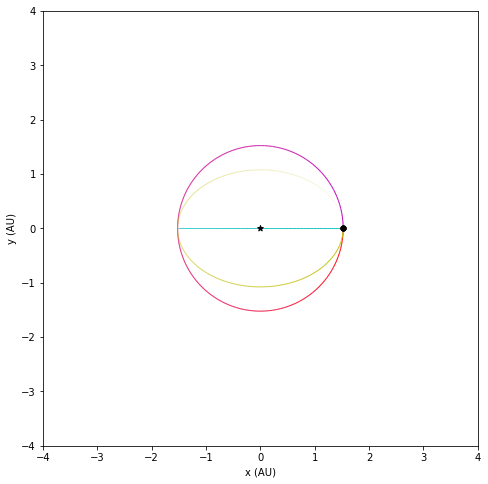

In [17]:
sim = start_new_sim(1) # this starts a new simulation with a star that is 1 solar mass

# adding Mars-like planet!
# Mars is ~1.5AU from the sun
sim.add(m=mass_Mars/mass_Sun, a=a_Mars, inc = 0)
sim.add(m=mass_Mars/mass_Sun, a=a_Mars, inc = radians(90))
sim.add(m=mass_Mars/mass_Sun, a=a_Mars, inc = radians(180))
sim.add(m=mass_Mars/mass_Sun, a=a_Mars, inc = radians(45))
sim.move_to_com()

fig, ax = rebound.OrbitPlot(sim, figsize=(8,8),  unitlabel="(AU)", color=True)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4) # notice that we changed the x and y axis limits!!
plt.show()

We can also view our system in an interactive widget. If you click and drag in the widget, you can adjust your view of the system.

In [18]:
# The function below launches the widget. size is the displayed size of the widget in pixels,
# while scale sets the volume of space depicted
sim.getWidget(scale=3,size=(500,500)) 



Widget(N=5, count=2, height=500.0, orbit_data=b'\xb3W\x03\xb6\x00\x00\x00\x00\x00\x00\x00\x00\xaa\xf1\xc2?\x86…

Let's integrate our planet's orbit forward in time. We can also use the interactive widget to watch our orbit as it evolves. We've condensed some of the code down for you into a function called ```integrate_with_widget```, which takes as arguments a simulation, a final time, and the number of frames to show as it is integrated up to the final time.

In [19]:
t_final = 5 # Length of simulation in years
N_frames = 200 # Number of frames in the animation

# Start new simulation - you only get 1 widget per simulation, so if you want a new widget, you need a new simulation
sim = start_new_sim(1.) # We call the definition, and we must pass the required elements
sim.add(m=3e-6, a=2., e=0.8, inc=radians(20.), omega=radians(45.), Omega=radians(293.), f=radians(45.), hash='Planet')
sim.move_to_com()

# And now integrate!
integrate_with_widget(sim, t_final, N_frames, 3)


Widget(N=2, count=2, height=500.0, orbit_data=b'p*\xa0\xb5\x01\xf9\x07\xb5\xecQ\xfd\xb4\x00\x00\x00@\xcd\xccL?…

<font color='cornflowerblue' size=4> **Try it yourself:** </font>

Copy everything in the cell above. This time, set the eccentricity to 0, and all the other values to zero as well. Run it to make sure it works. Then, add a *SECOND* planet, and change just one of the values to see how the orbit changes!

In [ ]:
# code here! 



<font color='cornflowerblue' size=4> **Challenge:** </font>

Try to make a simulation of the solar system! Only include the planets: Jupiter, Saturn, Uranus, Neptune, and the dwarf planet Pluto! Include the correct masses (already defined above), the correct distances (already defined above), the correct eccentricities (again, use data from the link provided above), and the correct names!

In [ ]:
# code here: 


<font color='cornflowerblue' size=4> **What is Jupiter's Orbital Period?**</font>

Since the only information that is used in constructing this simulation is info about the orbit, the amount of time it takes for Jupiter to orbit the sun is only related to it's orbital parameters! In particular, the orbital period is closely-related to the distance from the sun. Can you use the animation below to determine Jupiter's orbital period in terms of Earth-years (normal years, to us).

In [ ]:
%%capture 
# This cell produces a lot of unnecessary output, so we'll capture that output instead of printing it out.
# The next code cell will actually display the animation.

dt = 0.1 # Let's integrate a tenth of a year each step
N_steps = 200 # Let's integrate it forward for 20 steps, so 20*0.1 = 2 years

# Start a fresh simulation
sim = start_new_sim(1.) 
sim.add(m=3.E-6, a=1, e=0.0167,  hash='Earth')
sim.add(m=1.E-3, a=5.2, e=0.0485, hash='Jupiter')
sim.move_to_com()

# We need to create a figure (fig) and axes (ax) for the animation
fig,ax = plt.subplots(1,1,figsize=(5,5))

# The animation is created from a list of frames
frames = []

for i in range(N_steps):
    
    new_time = sim.t+dt # The time we want to integrate to
    sim.integrate(new_time) # And integrate!
    
    frames.append(make_rebound_frame(ax,sim)) # Add the new frame to the list for animation
       
# Create the animation
ani = animation.ArtistAnimation(fig, frames)

In [ ]:
ani

<sup> Notebook written by [Katie Chamberlain](katiechambe.github.io) in 2020. </sup>  